# **Goals**

This notebook contains an analysis on worldwide coffee consumption habits.
There were 4 main goals for this project:
1. Gain familiarity with the dataset.
2. Clean the data.
3. Identify appropriate questions for analysis.
4. Provide an analysis and create appropriate visualisations to give an insight into these questions.

### **Data**

The data for this project was downloaded from Kaggle and was provided by Waqar Ali under an Apache 2.0 license:
https://www.kaggle.com/datasets/waqi786/worldwide-coffee-habits-dataset


### **Loading the data**

We load the appropriate libraries as well as the dataset itself.

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [75]:
df = pd.read_csv("worldwide_coffee_habits.csv")

#Previewing the data

print(df.head())

      Country  Year  Coffee Consumption (kg per capita per year)  \
0  Country_39  2023                                     9.253939   
1  Country_29  2011                                     9.981203   
2  Country_15  2020                                     3.312916   
3  Country_43  2005                                     2.436180   
4   Country_8  2019                                     4.637849   

   Average Coffee Price (USD per kg) Type of Coffee Consumed  \
0                           6.467453               Americano   
1                           4.346744                   Mocha   
2                           8.767496                   Latte   
3                          11.748750                Espresso   
4                           8.999099                   Mocha   

   Population (millions)  
0              65.929478  
1              82.456680  
2             110.938862  
3              43.137207  
4              65.484262  


We collect some basic information about the dataset.

In [76]:
print(df.shape) #(No. of rows, No. of columns)

(10000, 6)


The dataset has 6 columns and 10000 rows.

We check if there are any null entries.

In [77]:
null_counts = df.isnull().sum()
print("Null entries per column:\n", null_counts)

Null entries per column:
 Country                                        0
Year                                           0
Coffee Consumption (kg per capita per year)    0
Average Coffee Price (USD per kg)              0
Type of Coffee Consumed                        0
Population (millions)                          0
dtype: int64


There are no null entries in the dataset.

We check that each column is of the appropriate data type.

In [78]:
print(df.dtypes)

Country                                         object
Year                                             int64
Coffee Consumption (kg per capita per year)    float64
Average Coffee Price (USD per kg)              float64
Type of Coffee Consumed                         object
Population (millions)                          float64
dtype: object


We rename some of the columns for ease of use.

In [79]:
df.rename(columns={'Coffee Consumption (kg per capita per year)': 'Consumption_kg_per_capita_per_annum', 
'Average Coffee Price (USD per kg)': 'Avg_price_usd_per_kg',
'Type of Coffee Consumed':'Type', 
'Population (millions)':'Population_millions'}, inplace=True)

In [80]:
print(df.columns)

Index(['Country', 'Year', 'Consumption_kg_per_capita_per_annum',
       'Avg_price_usd_per_kg', 'Type', 'Population_millions'],
      dtype='object')


Overview of the dataset.

In [81]:
print(df.describe())

               Year  Consumption_kg_per_capita_per_annum  \
count  10000.000000                         10000.000000   
mean    2011.666900                             6.061865   
std        6.911695                             2.313427   
min     2000.000000                             2.000385   
25%     2006.000000                             4.070743   
50%     2012.000000                             6.094491   
75%     2018.000000                             8.061127   
max     2023.000000                             9.999399   

       Avg_price_usd_per_kg  Population_millions  
count          10000.000000         10000.000000  
mean               9.461891            75.167120  
std                3.151403            43.023176  
min                4.000742             1.002494  
25%                6.728261            37.465847  
50%                9.458371            75.021943  
75%               12.136285           112.595868  
max               14.997053           149.995850  


#### **A. In this section of the analysis, we investigate coffee consumption over time (grouping by country).**

In [82]:
print(df.Country.unique())
print(df.Country.nunique())

['Country_39' 'Country_29' 'Country_15' 'Country_43' 'Country_8'
 'Country_21' 'Country_19' 'Country_23' 'Country_11' 'Country_24'
 'Country_36' 'Country_40' 'Country_3' 'Country_22' 'Country_2'
 'Country_44' 'Country_30' 'Country_38' 'Country_33' 'Country_12'
 'Country_25' 'Country_49' 'Country_27' 'Country_42' 'Country_28'
 'Country_16' 'Country_47' 'Country_37' 'Country_7' 'Country_9'
 'Country_18' 'Country_4' 'Country_14' 'Country_50' 'Country_26'
 'Country_20' 'Country_35' 'Country_17' 'Country_6' 'Country_34'
 'Country_10' 'Country_31' 'Country_48' 'Country_45' 'Country_41'
 'Country_1' 'Country_5' 'Country_13' 'Country_32' 'Country_46']
50


There are 50 unique countries in the dataset.

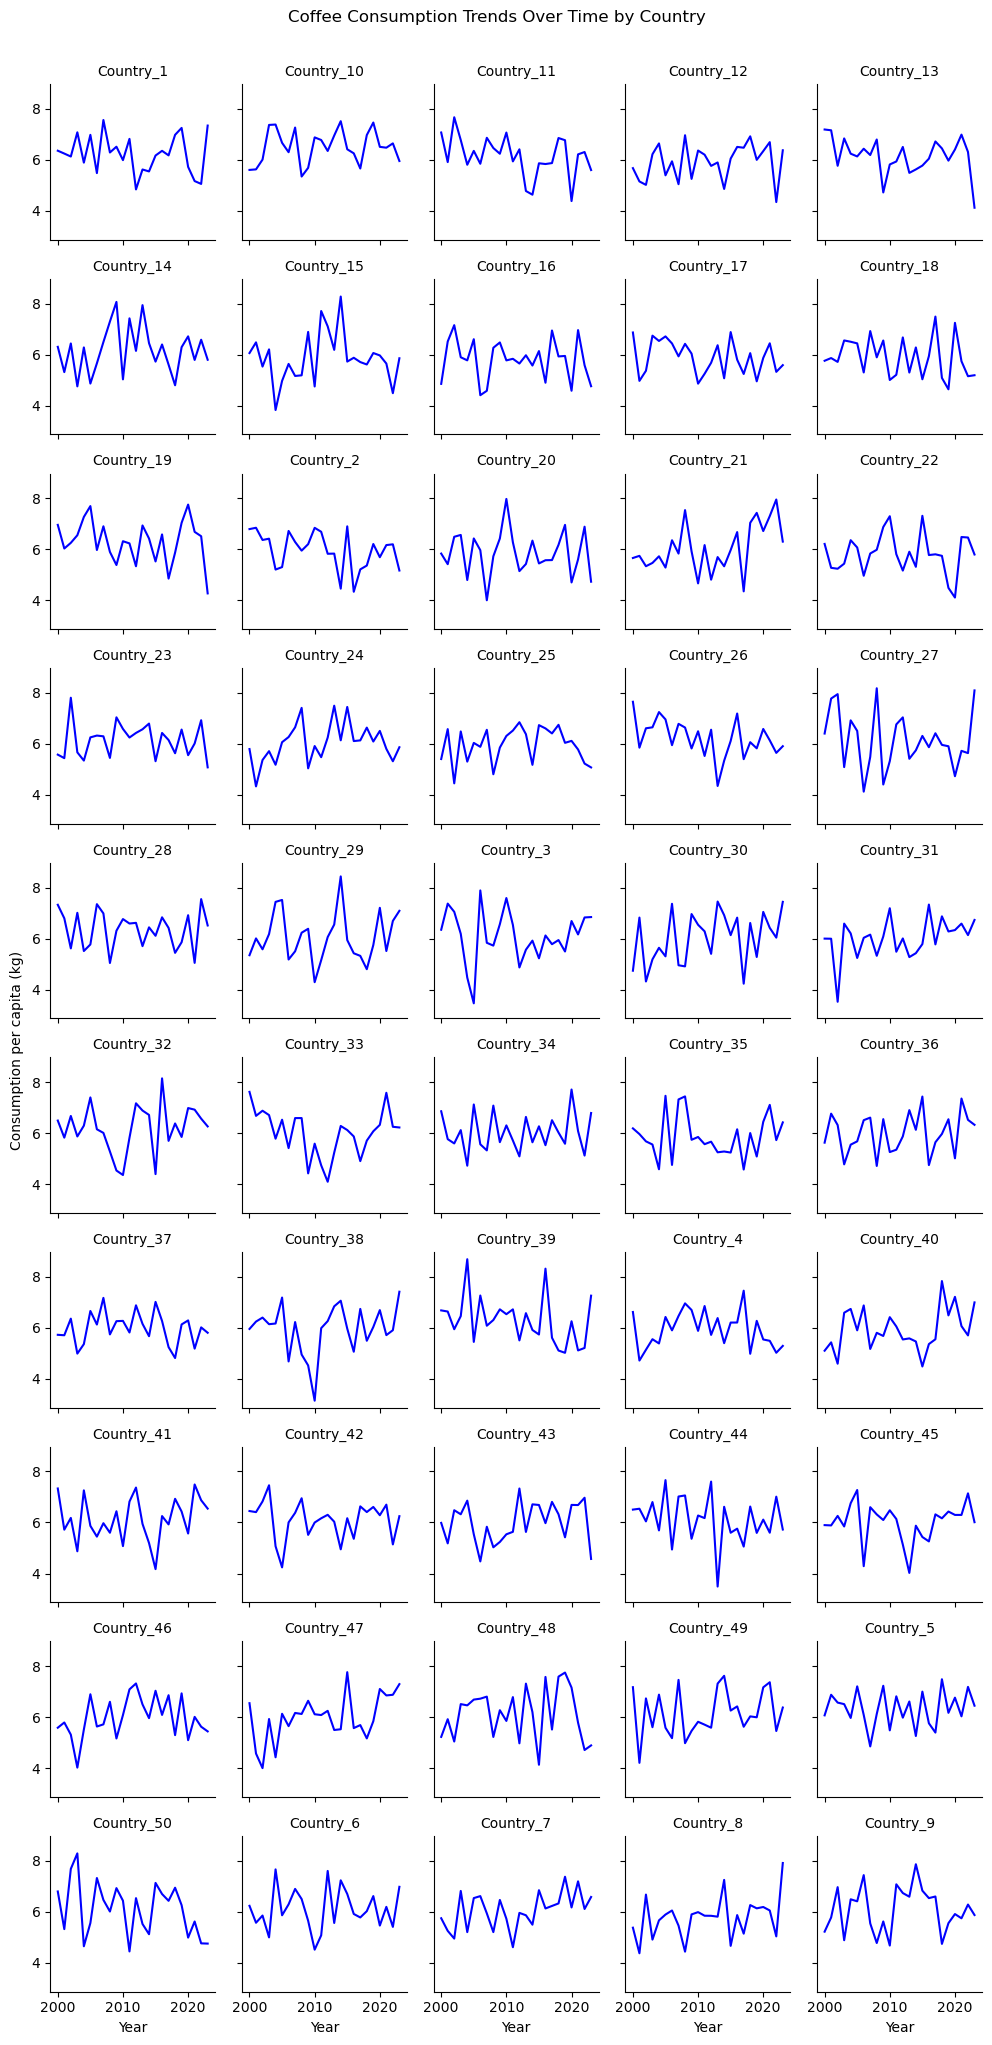

In [83]:
# Group by Country and Year, and calculate the average coffee consumption
country_yearly_consumption = df.groupby(['Country', 'Year'])['Consumption_kg_per_capita_per_annum'].mean().reset_index()

# Create a FacetGrid for each country
g = sns.FacetGrid(country_yearly_consumption, col='Country', col_wrap=5, height=2, sharey=True)
g.map(sns.lineplot, 'Year', 'Consumption_kg_per_capita_per_annum', color='b')

# Remove individual y-axis labels
g.set_ylabels("")

# Add a single y-axis label for the entire grid
plt.gcf().text(0.02, 0.5, 'Consumption per capita (kg)', ha='center', va='center', rotation='vertical')

# Set title and x-axis label
g.set_axis_labels("Year")
g.set_titles("{col_name}")
g.fig.suptitle("Coffee Consumption Trends Over Time by Country", y=1.02)

plt.show()

Consumption habits vary amongst countries. There is a significant dip in consumption in Country 38 in the year 2010. We product the plot for this country below, whilst adding a plot for the price of coffee per year in that country.

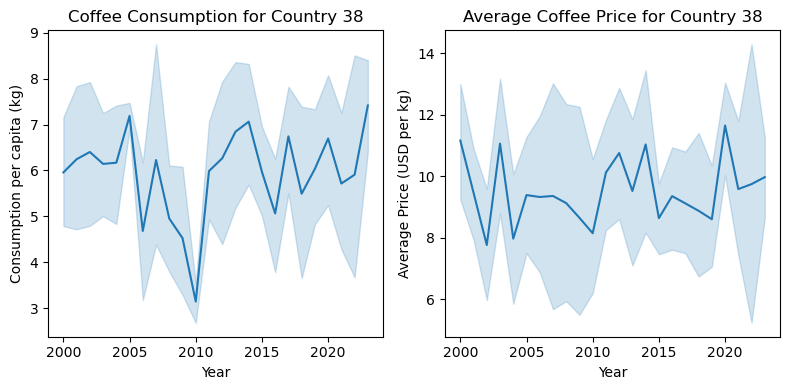

In [84]:
#All the data for Country 38
country_38 = df[df.Country == 'Country_38']

# Creating a figure and two subplots arranged in 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# First subplot for coffee consumption over time
sns.lineplot(x='Year', y='Consumption_kg_per_capita_per_annum', data=country_38, ax=ax1)
ax1.set_title("Coffee Consumption for Country 38")
ax1.set_xlabel("Year")
ax1.set_ylabel("Consumption per capita (kg)")

# Second subplot for average coffee price over time
sns.lineplot(x='Year', y='Avg_price_usd_per_kg', data=country_38, ax=ax2)
ax2.set_title("Average Coffee Price for Country 38")
ax2.set_xlabel("Year")
ax2.set_ylabel("Average Price per kg (USD)")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

The average price of coffee dipped along with the consumption in 2010. The cause of this dip is unclear from the current dataset, and additional data points (e.g. worldwide coffee production, countrywide economic growth) would be needed to investigate this.

#### **B. In this section of the analysis, we investigate the popularity of each coffee type across countries.**

In [85]:
print(df.Type.unique())

['Americano' 'Mocha' 'Latte' 'Espresso' 'Cappuccino']


We recall that there are 5 types of coffee given in the dataset: Americano, Mocha, Latte, Espresso and Cappuccino.

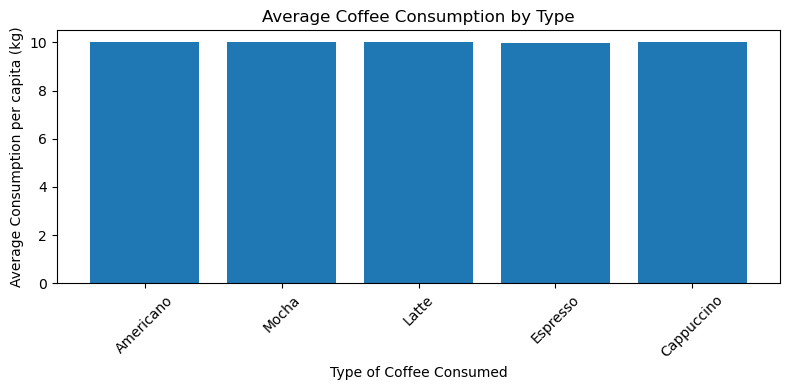

In [86]:
# Plotting the average consumption of each type of coffee
plt.figure(figsize=(8, 4))

plt.bar(df.Type, df.Consumption_kg_per_capita_per_annum)

# Adding titles and labels
plt.title("Average Coffee Consumption by Type")
plt.xlabel("Type of Coffee Consumed")
plt.ylabel("Average Consumption per capita (kg)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

We conclude that the amount of coffee consumed by the average individual is invariant of the type of coffee.

#### **C. In this section of the analysis, we investigate the average price of coffee (grouping by Type).**

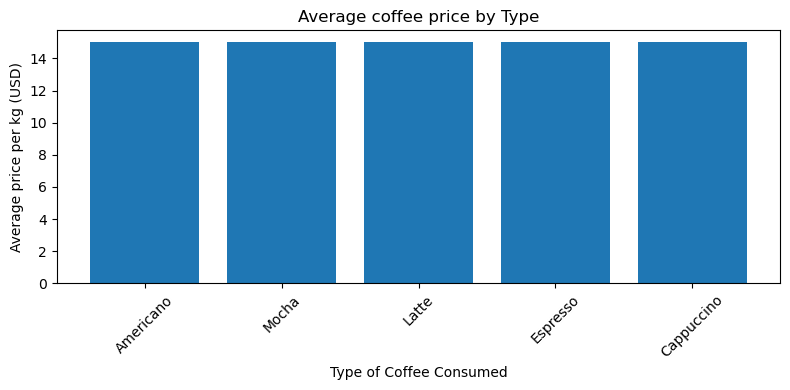

In [88]:
# Plotting the average consumption of each type of coffee
plt.figure(figsize=(8, 4))

plt.bar(df.Type, df.Avg_price_usd_per_kg)

# Adding titles and labels
plt.title("Average coffee price by Type")
plt.xlabel("Type of Coffee Consumed")
plt.ylabel("Average price per kg (USD)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The plot shows that the average price of coffee is invariant of the type of coffee. This is reasonable assuming that the price given in the dataset reflects only the coffee used in the drink (and doesn't take into consideration any additions e.g. milk).

D. In the final section of the analysis, we investigate whether the population of a country affects the amount of coffee each individual consumes.

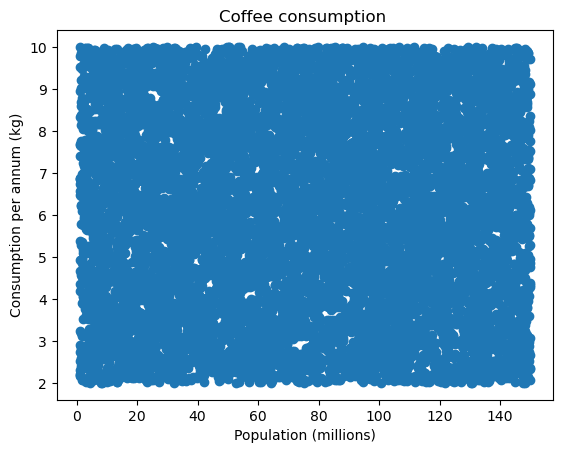

0.00945809868744711


In [102]:
plt.scatter(df.Population_millions, df.Consumption_kg_per_capita_per_annum)
plt.xlabel("Population (millions)")
plt.ylabel("Consumption per annum (kg)")
plt.title("Coffee consumption ")
plt.show()

correlation_coefficient = df.Consumption_kg_per_capita_per_annum.corr(df.Population_millions)
print(correlation_coefficient)

The plot suggests that there is no relationship between the size of a country and the amount of coffee consumed by each person. This is confirmed by the correlation coefficient of the two metrics.

#### **Conclusions and Future Analysis**

We were not able to identify any trends within this dataset. For future work, it would be ideal to collect datapoints for a wider number of metrics (e.g. the amount of coffee the country export and/or imports, the average age of the population etc.).